In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

filomena = cv.imread('imagenes/filomena.png')

# Ejercicio 4

Aplicación de la función isodata a la imagen realizada por la ESA de Filomena pasando por la Península Ibérica.

In [2]:
# Función isodata
def isodata(img, C):
    
    v = np.zeros( (C, img.shape[2]) )
    
    v = comienzo(v)
       
    resimg = np.ones( (img.shape[0], img.shape[1]), dtype = int)
    
    res = True
    while res:
        
        resimg, lc = clasificacion(img,v,resimg)
        
        vp = v.copy()
        
        for i in range(len(lc)):
            if len(lc[i]) > 0:
                v[i] = reasignacion(lc[i])
                
        mod = True
        for j in range(v.shape[0]):
            for k in range(v.shape[1]):
                mod = mod and (vp[j][k] - v[j][k]) == 0
        
        if mod:
            res = False
    
    return resimg

# Función para generar los casos base de los centroides

def comienzo(v):
    
    for i in range(v.shape[0]):
        v[i,:] = (random.randint(0,255),
                  random.randint(0,255),
                  random.randint(0,255))
    
    return v

# Función para clasificar cada pixel

def clasificacion(img,centros,resimg):
    
    lc = list()
    for z in range(centros.shape[0]):
        lc.append(list())
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j][0] == 0 and img[i,j][1] == 0 and img[i,j][2] == 0:
                resimg[i,j] = 0
            else:
                dist = list()
                for v in centros:
                    d = np.sqrt((np.power((img[i][j][0]-v[0]),2))
                                 +(np.power((img[i][j][1]-v[1]),2))
                                 +(np.power((img[i][j][2]-v[2]),2)))
                    dist.append(d)

                c = dist.index(min(dist))
                
                lc[c].append((img[i,j][0],img[i,j][1],img[i,j][2]))
                resimg[i,j] = c+1
                
    return resimg, lc


# Función para reasignar valores a los centros de clasificación
def reasignacion(c):
    
    medC1 = 0
    medC2 = 0
    medC3 = 0
    
    for t in c:
        medC1 += t[0]
        medC2 += t[1]
        medC3 += t[2]
        
    medC = (medC1/len(c),medC2/len(c),medC3/len(c))
    
    return medC

In [3]:
# Colorea con un seudocolor el resultado de la clasificación.
# Función seudo
def seudo(img):
    
    resimg = np.zeros((img.shape[0],img.shape[1],3),np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 0:
                resimg[i,j,:] = [255,0,0]
            elif img[i,j] == 1:
                resimg[i,j,:] = [0,255,0]
            elif img[i,j] == 2:
                resimg[i,j,:] = [0,0,255]
            elif img[i,j] == 3:
                resimg[i,j,:] = [255,255,0]
            elif img[i,j] == 4:
                resimg[i,j,:] = [0,255,255]
            elif img[i,j] == 5:
                resimg[i,j,:] = [255,0,255]
            else:
                resimg[i,j,:] = [0,0,0]
                
    return resimg

In [4]:
def diezmado(img, R):
    
    nds = list()
    i = 0
    
    # El diezmado se basa en la eliminación de pixeles en una imagen, y rehacer una matriz con los 
    # pixeles seleccionados, para ello la mejor forma sería recorrer la lista saltando aquellos 
    # pixeles que no usemos para la imagen diezmada.
    while i < img.shape[0]:
        j = 0
        while j < img.shape[1]:
            nds.append(img[i,j])
            j += int(1/R)
        i += int(1/R)
    
    # Una vez seleccionados esos pixeles, los transformaremos en un formato compatible con imagenes.
    resimg = np.reshape(nds,[int(np.ceil(img.shape[0]/(np.round(1/R)))),
                                 int(np.ceil(img.shape[1]/(np.round(1/R))))])

    return resimg

In [5]:
b1,b2,b3 = cv.split(filomena)
b1d = diezmado(b1,0.1)
b2d = diezmado(b2,0.1)
b3d = diezmado(b3,0.1)
fild = cv.merge((b1d,b2d,b3d))

In [6]:
iso_fil = isodata(fild,4)
seudo_fil = seudo(iso_fil)

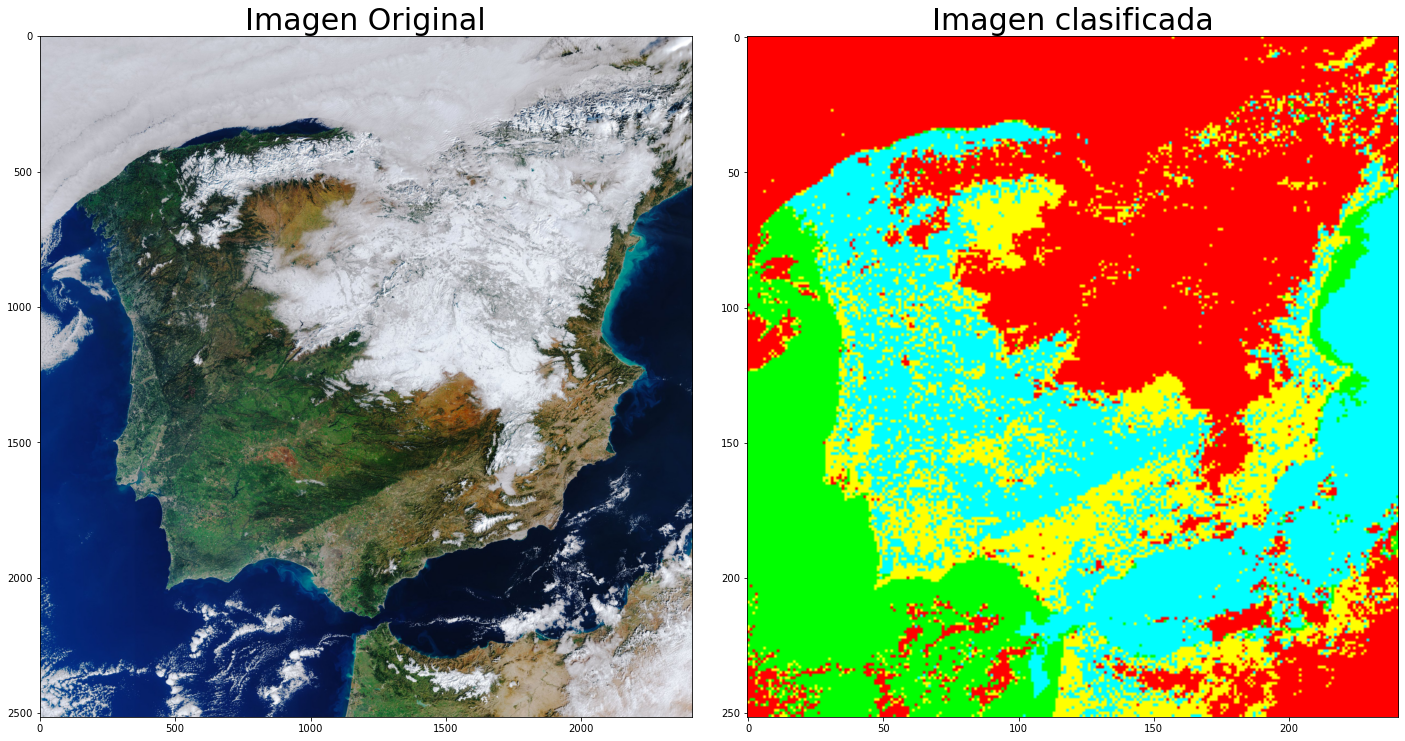

In [7]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(filomena, cv.COLOR_BGR2RGB))
plt.title("Imagen Original", fontsize = 30)
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(seudo_fil, cv.COLOR_BGR2RGB))
plt.title("Imagen clasificada", fontsize = 30)
plt.tight_layout()
plt.show()

In [8]:
cv.imwrite("soluciones/Ej4 - Isodata Filomena.png",seudo_fil)

True